# Phase 3 (Hasif/Gin)
## *Core Functions*

#### <span style="color:red; font-weight:bold">This ipynb file is to serve as production/test for the different sections of the algorithm/function module for the project in a step by step process before pushing to the final version</span>


In [1]:
# to check the current python path
import sys
print(sys.executable)

c:\Users\muham\AppData\Local\Programs\Python\Python310\python.exe


### 1. Moduels To Install

In [2]:
# yahoo Finance API to pull the data
import yfinance as yf

# pandas and Numpy for data maniupulation 
import pandas as pd
import numpy as np

# matplotlib and Ploty for visualizations (Testing purposes)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.patches import Rectangle
import plotly.graph_objects as go
import plotly.io as pio

# Check versions to avoid any compatibility issues
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("yfinance:", yf.__version__)


NumPy: 1.26.4
Pandas: 2.2.1
yfinance: 0.2.65


### 2. Pulling Data from Data.py (vizualization and understanding)

In [3]:
# toggle this to True if I want to reload after editing data.py
DO_RELOAD = False

import os, sys
from importlib import reload

# make sure repo root is in sys.path (needed since I'm running this notebook from /notebooks/)
repo_root = os.path.abspath("..")
if repo_root not in sys.path:
    sys.path.append(repo_root)

# import my data module (lives in app/services/data.py)
from app.services import data

if DO_RELOAD:
    data = reload(data)

print("loaded data module from:", data.__file__)

# build the datasets dict explicitly
datasets = data.build_datasets(years=3, iqr_k=3.0)

# unpack into separate variables
long_df    = datasets["long_df"]
open_df    = datasets["open_df"]
high_df    = datasets["high_df"]
low_df     = datasets["low_df"]
close_df   = datasets["close_df"]
volume_df  = datasets["volume_df"]

# if you also want the outliers
close_return_outliers = datasets["close_return_outliers"]
volume_outliers       = datasets["volume_outliers"]

# quick peek at the main df
display(long_df.head(8))

# check if 'Sector' column exists + what sectors are in there
print("\n[long_df] columns:", list(long_df.columns))
if "Sector" in long_df.columns:
    print("Sectors found:", sorted(long_df["Sector"].unique()))

# helper fn just to show column levels + preview df
def _show_col_levels(df, name):
    colnames = getattr(df.columns, "names", None)
    print(f"\n{name}: shape={df.shape} | col level names={colnames}")
    try:
        display(df.columns.to_frame(index=False).head(10))  # see (Sector, Ticker) pairs if MultiIndex
    except Exception:
        pass
    display(df.head())

# loop through and preview everything
for nm, df in [
    ("open_df", open_df),
    ("high_df", high_df),
    ("low_df", low_df),
    ("close_df", close_df),
    ("volume_df", volume_df),
    ("close_return_outliers", close_return_outliers),
    ("volume_outliers", volume_outliers),
]:
    _show_col_levels(df, nm)

loaded data module from: c:\Users\muham\INF1002-P1-08-StalkingStocks\app\services\data.py


[*********************100%***********************]  15 of 15 completed

[INFO] Long table built: 11265 rows × 8 cols.
[INFO] No duplicate (Date,Ticker) rows.
[INFO] Stripping time component from 'Date'.
[INFO] No missing values in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] → no forward-fill needed.
[INFO] No remaining missing values in ['Open', 'High', 'Low', 'Close', 'Adj Close'] → no interpolation needed.
[INFO] [Open] No NaNs after pivot.
[INFO] [High] No NaNs after pivot.
[INFO] [Low] No NaNs after pivot.
[INFO] [Close] No NaNs after pivot.
[INFO] [Adj Close] No NaNs after pivot.
[INFO] [Volume] No NaNs after pivot.
[INFO] Computing IQR outliers on Close returns (k=3.0).
[INFO] Computing IQR outliers on Volume (k=3.0).


Price,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2022-10-06,AAPL,145.809998,147.539993,145.220001,145.429993,143.169983,68402200
1,2022-10-07,AAPL,142.539993,143.100006,139.449997,140.089996,137.912964,85925600
2,2022-10-10,AAPL,140.419998,141.889999,138.570007,140.419998,138.237854,74899000
3,2022-10-11,AAPL,139.899994,141.350006,138.220001,138.979996,136.820236,77033700
4,2022-10-12,AAPL,139.130005,140.360001,138.160004,138.339996,136.190186,70433700
5,2022-10-13,AAPL,134.990005,143.589996,134.369995,142.990005,140.767899,113224000
6,2022-10-14,AAPL,144.309998,144.520004,138.190002,138.380005,136.229568,88598000
7,2022-10-17,AAPL,141.070007,142.899994,140.270004,142.410004,140.196945,85250900



[long_df] columns: ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

open_df: shape=(751, 15) | col level names=['Ticker']


,Ticker
0,AAPL
1,MSFT
2,NVDA
3,JPM
4,BAC
5,MA
6,JNJ
7,PFE
8,ABBV
9,PEP


Ticker,AAPL,MSFT,NVDA,JPM,BAC,MA,JNJ,PFE,ABBV,PEP,MCD,NKE,XOM,SHEL,CVX
Date,,,,,,,,,,,,,,,
2022-10-06,145.809998,247.929993,13.220,109.459999,31.600000,302.579987,164.789993,43.759998,142.789993,165.789993,239.339996,90.489998,98.470001,51.040001,157.339996
2022-10-07,142.539993,240.899994,12.505,107.519997,31.170000,296.660004,161.770004,43.049999,139.009995,162.300003,233.960007,88.540001,102.190002,52.139999,162.509995
2022-10-10,140.419998,233.050003,12.037,106.730003,30.900000,297.040009,160.630005,42.349998,139.029999,161.990005,233.410004,87.760002,101.489998,51.790001,161.000000
2022-10-11,139.899994,227.619995,11.561,104.370003,30.370001,289.829987,160.369995,41.660000,138.020004,162.240005,234.160004,86.040001,97.220001,50.730000,154.750000
2022-10-12,139.130005,225.399994,11.579,101.800003,29.639999,286.540009,162.940002,42.090000,141.639999,168.729996,237.270004,88.000000,97.500000,50.009998,156.139999



high_df: shape=(751, 15) | col level names=['Ticker']


,Ticker
0,AAPL
1,MSFT
2,NVDA
3,JPM
4,BAC
5,MA
6,JNJ
7,PFE
8,ABBV
9,PEP


Ticker,AAPL,MSFT,NVDA,JPM,BAC,MA,JNJ,PFE,ABBV,PEP,MCD,NKE,XOM,SHEL,CVX
Date,,,,,,,,,,,,,,,
2022-10-06,147.539993,250.339996,13.656,110.190002,31.879999,305.049988,165.000000,43.779999,142.990005,166.020004,239.880005,92.639999,102.180000,52.029999,161.940002
2022-10-07,143.100006,241.320007,12.670,107.709999,31.240000,297.190002,162.220001,43.049999,140.050003,163.009995,234.600006,88.760002,103.320000,52.630001,163.929993
2022-10-10,141.889999,234.559998,12.124,107.309998,31.049999,297.250000,161.279999,42.619999,139.589996,163.039993,236.259995,87.779999,102.029999,52.029999,161.470001
2022-10-11,141.350006,229.059998,11.846,104.540001,30.469999,290.390015,164.110001,42.570000,143.679993,164.270004,239.119995,88.250000,99.760002,51.250000,159.929993
2022-10-12,140.360001,227.860001,11.735,104.730003,30.309999,287.489990,164.880005,43.139999,143.059998,170.699997,240.039993,88.879997,98.910004,50.724998,158.809998



low_df: shape=(751, 15) | col level names=['Ticker']


,Ticker
0,AAPL
1,MSFT
2,NVDA
3,JPM
4,BAC
5,MA
6,JNJ
7,PFE
8,ABBV
9,PEP


Ticker,AAPL,MSFT,NVDA,JPM,BAC,MA,JNJ,PFE,ABBV,PEP,MCD,NKE,XOM,SHEL,CVX
Date,,,,,,,,,,,,,,,
2022-10-06,145.220001,246.080002,13.103,107.940002,31.360001,298.859985,161.690002,43.040001,139.899994,162.500000,234.460007,89.809998,98.330002,50.880001,157.199997
2022-10-07,139.449997,233.169998,12.022,105.269997,30.530001,292.989990,159.169998,41.919998,137.550003,160.979996,232.080002,86.690002,100.180000,51.639999,159.059998
2022-10-10,138.570007,226.729996,11.408,104.519997,30.350000,289.540009,159.179993,41.750000,136.869995,161.190002,233.410004,85.070000,98.720001,51.119999,156.440002
2022-10-11,138.220001,224.110001,11.283,101.849998,29.570000,284.420013,160.369995,41.450001,138.020004,161.559998,233.929993,85.750000,96.750000,50.060001,154.110001
2022-10-12,138.160004,223.960007,11.345,101.279999,29.480000,283.209991,162.500000,41.919998,139.929993,166.600006,237.059998,87.309998,97.230003,49.724201,155.520004



close_df: shape=(751, 15) | col level names=['Ticker']


,Ticker
0,AAPL
1,MSFT
2,NVDA
3,JPM
4,BAC
5,MA
6,JNJ
7,PFE
8,ABBV
9,PEP


Ticker,AAPL,MSFT,NVDA,JPM,BAC,MA,JNJ,PFE,ABBV,PEP,MCD,NKE,XOM,SHEL,CVX
Date,,,,,,,,,,,,,,,
2022-10-06,145.429993,246.789993,13.130,108.139999,31.459999,299.230011,161.910004,43.090000,140.289993,162.800003,234.750000,90.169998,102.059998,51.669998,161.419998
2022-10-07,140.089996,234.240005,12.076,105.980003,30.750000,294.970001,160.199997,42.320000,138.759995,161.610001,233.190002,87.160004,101.029999,51.970001,160.029999
2022-10-10,140.419998,229.250000,11.670,104.989998,30.660000,291.779999,160.410004,41.750000,138.309998,161.820007,234.949997,86.690002,98.839996,51.160000,157.139999
2022-10-11,138.979996,225.410004,11.586,101.959999,29.770000,286.049988,162.729996,41.919998,141.509995,162.589996,237.050003,87.989998,98.000000,50.180000,157.169998
2022-10-12,138.339996,225.750000,11.500,103.610001,29.860001,283.380005,162.690002,42.029999,139.979996,169.389999,237.059998,88.510002,98.430000,50.320000,157.639999



volume_df: shape=(751, 15) | col level names=['Ticker']


,Ticker
0,AAPL
1,MSFT
2,NVDA
3,JPM
4,BAC
5,MA
6,JNJ
7,PFE
8,ABBV
9,PEP


Ticker,AAPL,MSFT,NVDA,JPM,BAC,MA,JNJ,PFE,ABBV,PEP,MCD,NKE,XOM,SHEL,CVX
Date,,,,,,,,,,,,,,,
2022-10-06,68402200,20239900,644157000,11521400,40891900,2494400,5890700,22068200,5124800,4623400,2999200,9951900,29124700,12213514,9498300
2022-10-07,85925600,37769600,672478000,11681100,52304600,2210800,6363500,20095000,4648800,4779200,2294300,8554700,24507600,6085787,9972500
2022-10-10,74899000,29743600,698699000,8931700,37669100,1783500,5315600,17888000,3830800,4839200,2668700,7991200,16786100,3820625,5904500
2022-10-11,77033700,30474000,667482000,12739700,58124000,3554900,6212200,20981200,5675100,5222600,3169200,11903200,17804100,4254453,7533300
2022-10-12,70433700,21903900,492590000,13181000,36137900,2646800,4341700,18803600,4528000,9795300,2709300,8772900,12635800,4001576,4942000



close_return_outliers: shape=(751, 15) | col level names=['Ticker']


,Ticker
0,AAPL
1,ABBV
2,BAC
3,CVX
4,JNJ
5,JPM
6,MA
7,MCD
8,MSFT
9,NKE


Ticker,AAPL,ABBV,BAC,CVX,JNJ,JPM,MA,MCD,MSFT,NKE,NVDA,PEP,PFE,SHEL,XOM
Date,,,,,,,,,,,,,,,
2022-10-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-10-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-10-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-10-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-10-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False



volume_outliers: shape=(751, 15) | col level names=['Ticker']


,Ticker
0,AAPL
1,ABBV
2,BAC
3,CVX
4,JNJ
5,JPM
6,MA
7,MCD
8,MSFT
9,NKE


Ticker,AAPL,ABBV,BAC,CVX,JNJ,JPM,MA,MCD,MSFT,NKE,NVDA,PEP,PFE,SHEL,XOM
Date,,,,,,,,,,,,,,,
2022-10-06,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2022-10-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-10-10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-10-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-10-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


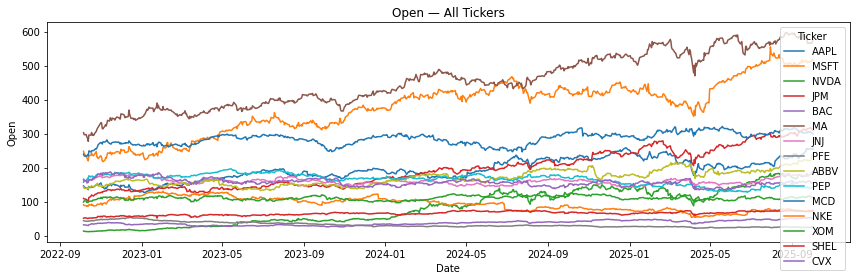

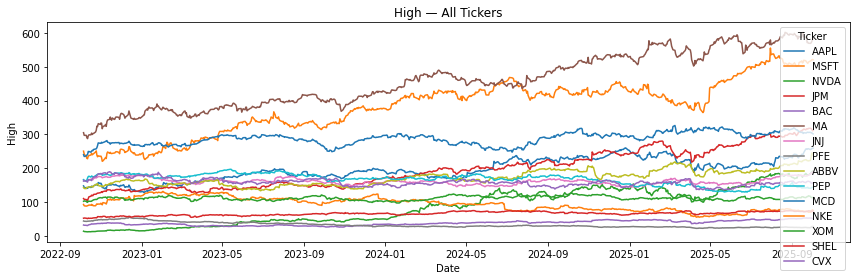

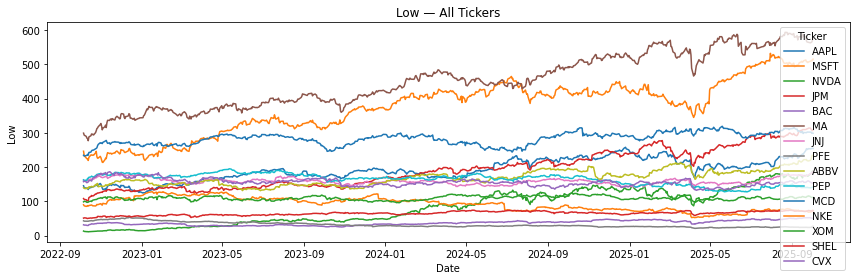

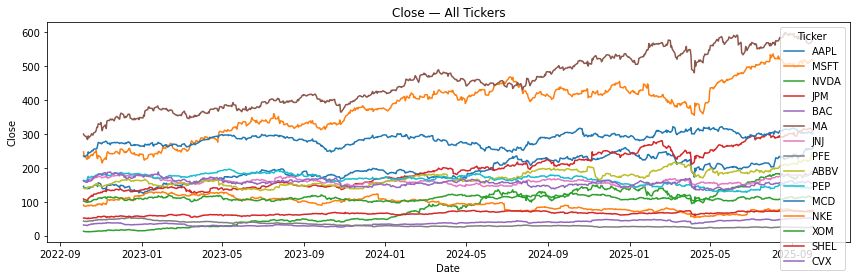

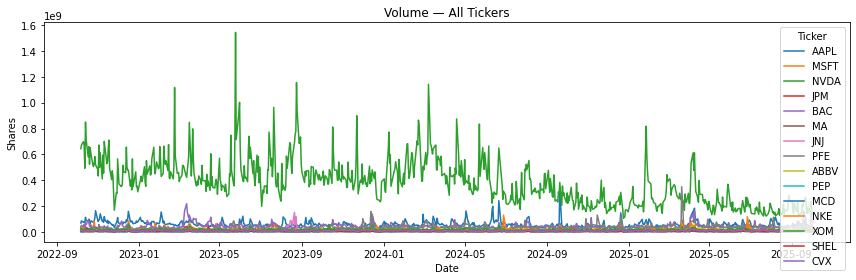

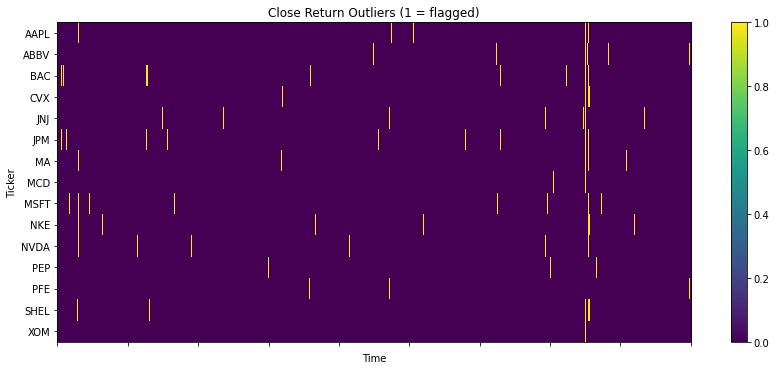

In [4]:
# plotting what I pulled; no data massaging here.
import matplotlib.pyplot as plt
import numpy as np

# helper: flatten MultiIndex cols like ('Tech','AAPL') -> 'Tech:AAPL' so legends don’t look messy
def _flatten_cols(df):
    if hasattr(df, "columns") and getattr(df.columns, "nlevels", 1) > 1:
        df = df.copy()
        df.columns = [f"{lvl0}:{lvl1}" for lvl0, lvl1 in df.columns.to_list()]
    return df

# ========== OHLC (raw) ==========
for name, df, ylabel in [
    ("Open",  open_df,  "Open"),
    ("High",  high_df,  "High"),
    ("Low",   low_df,   "Low"),
    ("Close", close_df, "Close"),
]:
    plt.figure(figsize=(12, 4))
    _flat = _flatten_cols(df)      # purely cosmetic (legend); data stays intact
    _flat.plot(ax=plt.gca(), legend=True)
    plt.title(f"{name} — All Tickers")
    plt.xlabel("Date"); plt.ylabel(ylabel)
    plt.tight_layout(); plt.show()

# ========== Volume (raw; no smoothing) ==========
plt.figure(figsize=(12, 4))
_flat = _flatten_cols(volume_df)   # no rolling/smoothing — plotting as-is
_flat.plot(ax=plt.gca(), legend=True)
plt.title("Volume — All Tickers")
plt.xlabel("Date"); plt.ylabel("Shares")
plt.tight_layout(); plt.show()

# ========== Outlier heatmap (flags only) ==========
# I’m showing close-return outliers; I can swap to volume_outliers if I need that view.
out_df = close_return_outliers.astype(int)

# y-axis labels: use "Sector:Ticker" if it’s a MultiIndex, else just the ticker
if getattr(out_df.columns, "nlevels", 1) > 1:
    y_labels = [f"{s}:{t}" for s, t in out_df.columns.to_list()]
else:
    y_labels = list(out_df.columns)

Z = out_df.values.T  # shape: (tickers x dates) for imshow
fig, ax = plt.subplots(figsize=(12, max(4, len(y_labels)*0.35)))
im = ax.imshow(Z, aspect="auto", interpolation="nearest")

ax.set_title("Close Return Outliers (1 = flagged)")
ax.set_xlabel("Time")
ax.set_ylabel("Ticker")
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)

# trim x ticks so it doesn’t turn into a barcode of labels
ax.set_xticks(np.linspace(0, Z.shape[1]-1, num=min(10, Z.shape[1]), dtype=int))
ax.set_xticklabels([""]*len(ax.get_xticks()))

fig.colorbar(im)

# optional numbers on cells (I only do this for small matrices so it stays readable)
max_cells_to_annotate = 2000
H, W = Z.shape
if H * W <= max_cells_to_annotate:
    for i in range(H):
        for j in range(W):
            ax.text(j, i, str(Z[i, j]), ha="center", va="center", fontsize=8, color="black")

plt.tight_layout(); plt.show()


###  3. Feature Algoritms


### 3.1 Simple Moving Averages (SMA) Function

The SMA smooths out price data by averaging the last *N* closing prices.  
This helps to reduce noise and highlight the underlying trend.

- **SMA(5):** very short-term view, captures quick movements and short trends.  
- **SMA(20):** medium-term view, roughly one trading month, balances noise and trend.  
- **SMA(50):** longer-term view, often used to confirm sustained direction.  

Using multiple windows together allows comparison of short vs. medium vs. long-term momentum, which can reveal crossovers and shifts in trend direction.


- Rationale: Use SMA windows 5/20/50 as widely used lookbacks (5 = very short-term, 20 ≈ one trading month, 50 = medium-term trend).
- SMA = arithmetic mean of the last N closes → implemented via rolling(N).mean().
- Source (supports common periods and SMA definition): 
- https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

##### <span style="color:red; font-weight:bold">Manually computed SMA (without modules)</span>

In [5]:
def compute_sma_list(values, window: int):
    """
    Compute simple moving averages (SMAs) with nothing but Python.
    - values: list of numbers (closing prices)
    - window: how many days to average (5, 20, 50, etc.)
    Returns a list the same length as input, with None for the first
    (window-1) entries where not enough data exists yet.
    """
    n = len(values)
    out = [None] * n  # pre-fill with None

    if window <= 0 or n == 0:
        return out

    running_sum = 0.0
    for i, v in enumerate(values):
        if v is None:             # skip bad/missing values
            out[i] = None
            continue

        running_sum += float(v)   # add current value

        if i >= window:           # drop value that just slid out of window
            running_sum -= float(values[i - window])

        if i >= window - 1:       # only valid once we’ve seen at least 'window' values
            out[i] = running_sum / window

    return out


def add_smas_manual_python(rows, windows=(5, 20, 50)):
    """
    rows = list of dicts, e.g. {"Ticker": "AAPL", "Date": "2022-01-01", "Close": 145.0}
    For each ticker:
      - sort by Date
      - compute SMA for each window size
      - attach as new fields like SMA_5_manual, SMA_20_manual, SMA_50_manual
    Returns a combined list of dicts with the extra columns.
    """
    # group rows manually by ticker
    grouped = {}
    for row in rows:
        tkr = row["Ticker"]
        grouped.setdefault(tkr, []).append(row)

    output = []

    for tkr, g in grouped.items():
        # sort by Date so averages are in time order
        g = sorted(g, key=lambda r: r["Date"])
        closes = [r["Close"] for r in g]

        # compute SMA lists for each requested window size
        sma_results = {w: compute_sma_list(closes, w) for w in windows}

        # attach the SMA values back into each row
        for i, row in enumerate(g):
            for w in windows:
                row[f"SMA_{w}_manual"] = sma_results[w][i]
            output.append(row)

    return output

In [6]:
# Convert long_df (pandas DataFrame) into list-of-dicts
rows = long_df.to_dict(orient="records")

# Compute SMA(5), SMA(20), SMA(50) manually
sma_rows = add_smas_manual_python(rows, windows=(5, 20, 50))

# Back to DataFrame for analysis/plotting
long_df_sma_manual = pd.DataFrame(sma_rows)

# Filter to show only specific columns
selected_columns = ["Date", "Ticker", "Close", "SMA_5_manual", "SMA_20_manual", "SMA_50_manual"]
filtered_df = long_df_sma_manual[selected_columns]

# Select specific rows: 4–6, 19–21, 49–51
selected_rows = list(range(4, 7)) + list(range(19, 22)) + list(range(49, 52))
filtered_rows = filtered_df.iloc[selected_rows]

# Display the result
display(filtered_rows)

,Date,Ticker,Close,SMA_5_manual,SMA_20_manual,SMA_50_manual
4,2022-10-12,AAPL,138.339996,140.651996,NaN,NaN
5,2022-10-13,AAPL,142.990005,140.163998,NaN,NaN
6,2022-10-14,AAPL,138.380005,139.822000,NaN,NaN
19,2022-11-02,AAPL,145.029999,149.912000,145.300500,NaN
20,2022-11-03,AAPL,138.880005,148.728000,144.973000,NaN
21,2022-11-04,AAPL,138.380005,145.256000,144.887501,NaN
49,2022-12-15,AAPL,136.500000,142.366003,145.694000,145.0824
50,2022-12-16,AAPL,134.509995,140.836002,144.883500,144.8640
51,2022-12-19,AAPL,132.369995,138.412000,143.937500,144.7096


In [7]:
# example usage

# convert long_df (pandas DataFrame) into list-of-dicts
rows = long_df.to_dict(orient="records")
# compute SMA(5), SMA(20), SMA(50) manually
sma_rows = add_smas_manual_python(rows, windows=(5, 20, 50))
# back to DataFrame for analysis/plotting
long_df_sma_manual = pd.DataFrame(sma_rows)
# sanity check
display(long_df_sma_manual.head(50))

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,SMA_5_manual,SMA_20_manual,SMA_50_manual
0,2022-10-06,AAPL,145.809998,147.539993,145.220001,145.429993,143.169983,68402200,NaN,NaN,NaN
1,2022-10-07,AAPL,142.539993,143.100006,139.449997,140.089996,137.912964,85925600,NaN,NaN,NaN
2,2022-10-10,AAPL,140.419998,141.889999,138.570007,140.419998,138.237854,74899000,NaN,NaN,NaN
3,2022-10-11,AAPL,139.899994,141.350006,138.220001,138.979996,136.820236,77033700,NaN,NaN,NaN
4,2022-10-12,AAPL,139.130005,140.360001,138.160004,138.339996,136.190186,70433700,140.651996,NaN,NaN
5,2022-10-13,AAPL,134.990005,143.589996,134.369995,142.990005,140.767899,113224000,140.163998,NaN,NaN
6,2022-10-14,AAPL,144.309998,144.520004,138.190002,138.380005,136.229568,88598000,139.822000,NaN,NaN
7,2022-10-17,AAPL,141.070007,142.899994,140.270004,142.410004,140.196945,85250900,140.220001,NaN,NaN
8,2022-10-18,AAPL,145.490005,146.699997,140.610001,143.750000,141.516113,99136600,141.174002,NaN,NaN
9,2022-10-19,AAPL,141.690002,144.949997,141.500000,143.860001,141.624405,61758300,142.278003,NaN,NaN


##### <span style="color:red; font-weight:bold">Modules computed SMA (with modules)</span>

In [8]:

def add_smas(long_df: pd.DataFrame, windows=(5, 20, 50)) -> pd.DataFrame:
    """
    Efficiently add simple moving average (SMA) columns to a tidy long-format DataFrame.

    Parameters
    ----------
    long_df : pd.DataFrame
        Must contain ['Date', 'Ticker', 'Close'] at minimum.
    windows : tuple of int, default (5, 20, 50)
        Window sizes for the SMAs to compute.

    Returns
    -------
    pd.DataFrame
        The original DataFrame with new SMA columns (SMA_{w}).
    """
    # sort once for consistent rolling behaviour
    long_df = long_df.sort_values(["Ticker", "Date"]).copy()

    # group by ticker so SMAs don’t bleed across stocks
    grouped = long_df.groupby("Ticker", group_keys=False)

    # compute one SMA column per window
    for w in windows:
        long_df[f"SMA_{w}"] = grouped["Close"].transform(
            lambda x: x.rolling(window=w, min_periods=w).mean()
        )

    return long_df


# example usage
long_df_sma = add_smas(long_df, windows=(5, 20, 50))

# quick peek
display(long_df_sma.head(50))

Price,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_20,SMA_50
0,2022-10-06,AAPL,145.809998,147.539993,145.220001,145.429993,143.169983,68402200,NaN,NaN,NaN
1,2022-10-07,AAPL,142.539993,143.100006,139.449997,140.089996,137.912964,85925600,NaN,NaN,NaN
2,2022-10-10,AAPL,140.419998,141.889999,138.570007,140.419998,138.237854,74899000,NaN,NaN,NaN
3,2022-10-11,AAPL,139.899994,141.350006,138.220001,138.979996,136.820236,77033700,NaN,NaN,NaN
4,2022-10-12,AAPL,139.130005,140.360001,138.160004,138.339996,136.190186,70433700,140.651996,NaN,NaN
5,2022-10-13,AAPL,134.990005,143.589996,134.369995,142.990005,140.767899,113224000,140.163998,NaN,NaN
6,2022-10-14,AAPL,144.309998,144.520004,138.190002,138.380005,136.229568,88598000,139.822000,NaN,NaN
7,2022-10-17,AAPL,141.070007,142.899994,140.270004,142.410004,140.196945,85250900,140.220001,NaN,NaN
8,2022-10-18,AAPL,145.490005,146.699997,140.610001,143.750000,141.516113,99136600,141.174002,NaN,NaN
9,2022-10-19,AAPL,141.690002,144.949997,141.500000,143.860001,141.624405,61758300,142.278003,NaN,NaN


In [9]:
def sma_wide_sorted_manual(rows, window: int) -> pd.DataFrame:
    """
    Build a wide-format DataFrame of SMA values (manual SMA version).
    - rows: list of dicts from add_smas_manual_python
    - window: integer, e.g. 5, 20, 50
    Returns:
      - DataFrame with rows = Date, cols = Tickers, values = SMA_window_manual
        (tickers sorted by most recent SMA)
    """
    import pandas as pd

    # convert manual rows (list of dicts) into a DataFrame
    df = pd.DataFrame(rows)

    # pivot into wide form (Date × Ticker)
    wide = df.pivot(index="Date", columns="Ticker", values=f"SMA_{window}_manual").sort_index()

    # forward-fill to fill gaps
    latest = wide.ffill().iloc[-1]

    # reorder columns by latest SMA value
    wide = wide.loc[:, latest.sort_values().index]

    return wide


# example usage
rows_with_sma = add_smas_manual_python(rows, windows=(5, 20, 50))
sma5 = sma_wide_sorted_manual(rows_with_sma, 5)
display(sma5.head())

Ticker,PFE,BAC,NKE,SHEL,XOM,PEP,CVX,JNJ,NVDA,ABBV,AAPL,MCD,JPM,MSFT,MA
Date,,,,,,,,,,,,,,,
2022-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-12,42.221999,30.5,88.104001,51.06,99.671999,163.642001,158.679999,161.588,11.9924,139.769995,140.651996,235.4,104.936,232.288,291.082001


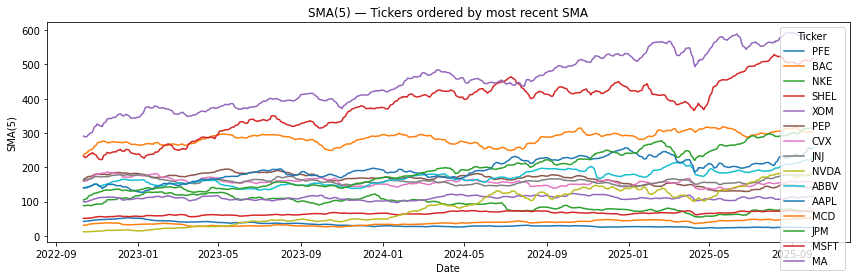

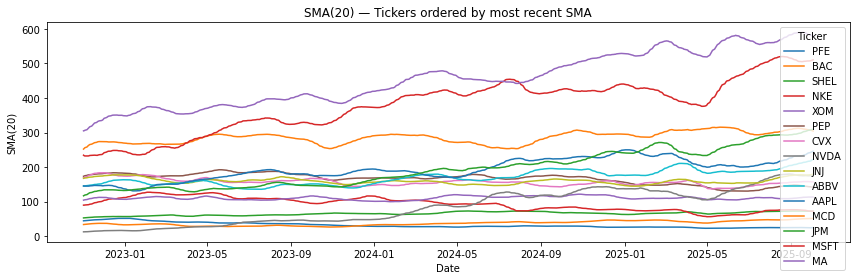

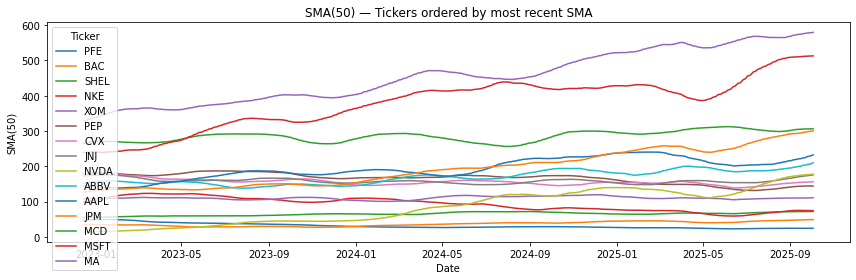

In [10]:
def plot_sma_by_window_manual(rows, window: int):
    """
    Plot a wide-format SMA chart for all tickers (manual SMA version).
    - rows: list of dicts from add_smas_manual_python
    - window: size of the SMA to plot (e.g., 5, 20, 50)

    Steps:
      1. Convert manual rows to wide format with sma_wide_sorted_manual
      2. Reorder tickers by their latest SMA value
      3. Plot all SMA curves on one chart
    """
    # reorder tickers by their latest SMA value
    sma_wide = sma_wide_sorted_manual(rows, window)

    # make figure and plot
    plt.figure(figsize=(12, 4))
    sma_wide.plot(ax=plt.gca(), legend=True)

    # add labels and title
    plt.title(f"SMA({window}) — Tickers ordered by most recent SMA")
    plt.xlabel("Date")
    plt.ylabel(f"SMA({window})")
    plt.tight_layout()
    plt.show()


# example usage
rows_with_sma = add_smas_manual_python(rows, windows=(5, 20, 50))
for w in (5, 20, 50):
    plot_sma_by_window_manual(rows_with_sma, w)


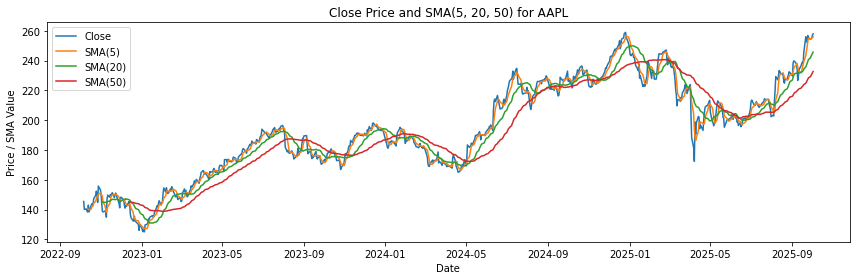

In [11]:

def plot_single_ticker_sma_with_close(rows, ticker: str):
    """
    Plot Close price and SMA(5), SMA(20), SMA(50) for a single ticker on one chart.
    - rows: list of dicts from add_smas_manual_python
    - ticker: the ticker symbol to filter and plot
    """
    # Convert to DataFrame
    df = pd.DataFrame(rows)

    # Filter for the selected ticker
    df_ticker = df[df["Ticker"] == ticker].sort_values("Date")

    # Plot Close and SMA lines
    plt.figure(figsize=(12, 4))
    plt.plot(df_ticker["Date"], df_ticker["Close"], label="Close", linewidth=1.5)
    plt.plot(df_ticker["Date"], df_ticker["SMA_5_manual"], label="SMA(5)")
    plt.plot(df_ticker["Date"], df_ticker["SMA_20_manual"], label="SMA(20)")
    plt.plot(df_ticker["Date"], df_ticker["SMA_50_manual"], label="SMA(50)")

    # Add labels, title, legend
    plt.title(f"Close Price and SMA(5, 20, 50) for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price / SMA Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

rows_with_sma = add_smas_manual_python(rows, windows=(5, 20, 50))
plot_single_ticker_sma_with_close(rows_with_sma, ticker="AAPL")

#### 3.2 Upward and Downward Runs

Trend runs measure how many days in a row a stock keeps moving in the same direction.  
- **Up run:** consecutive days with rising closes.  
- **Down run:** consecutive days with falling closes.  
- **Flat day:** no change, treated as neutral.  

From these runs we track:  
- total counts of up and down runs,  
- the **longest streaks** in each direction.  

This highlights persistence of trends and shows which tickers sustain momentum versus which reverse quickly.

- Trend runs rationale:
- Up run = consecutive days with Close_t > Close_{t-1}; Down run = consecutive days with Close_t < Close_{t-1}.
- Flat (Close_t == Close_{t-1}) is treated as neutral and *omits/breaks* runs — it neither lengthens a run nor counts as a run.
- This follows runs-test practice of forming a dichotomous (+/−) sequence and omitting ties.
- Plotting convention: up segments green, down segments red (standard candlestick colouring).
- Sources:
  - Runs definition & handling ties: https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test
  - Candlestick colours (green up, red down): https://www.investopedia.com/ask/answers/07/candlestickcolor.asp

##### <span style="color:red; font-weight:bold">Manually computed Up/Down Runs (without modules -outdated)</span>


In [12]:
def compute_trend_runs_manual(rows):
    """
    Compute trend runs (up/down streaks) using plain Python.
    rows = list of dicts, e.g. {"Ticker": "AAPL", "Date": "2022-01-01", "Close": 145.0}

    For each ticker:
      - sort by Date
      - compare each day's Close with the previous day
      - Direction: +1 = up, -1 = down, 0 = flat
      - Count consecutive streaks of ups or downs
      - Track:
          * total number of up/down runs
          * longest up/down run lengths
    Returns a list of dicts with per-ticker results.
    """
    # group rows manually by ticker
    grouped = {}
    for row in rows:
        tkr = row["Ticker"]
        grouped.setdefault(tkr, []).append(row)

    results = []

    for tkr, g in grouped.items():
        # sort by Date so comparisons happen in time order
        g = sorted(g, key=lambda r: r["Date"])

        # build a direction list: +1 (up), -1 (down), 0 (flat)
        directions = []
        prev_close = None
        for row in g:
            close = row["Close"]
            if prev_close is None:
                directions.append(0)            # first day has no "change"
            else:
                if close > prev_close:
                    directions.append(1)        # up day
                elif close < prev_close:
                    directions.append(-1)       # down day
                else:
                    directions.append(0)        # flat day
            prev_close = close

        # now scan through directions to form runs
        runs = []
        current_dir = 0
        run_len = 0

        for d in directions:
            if d == current_dir and d != 0:
                run_len += 1                    # extend current run
            else:
                if current_dir != 0:
                    runs.append((current_dir, run_len))  # save finished run
                current_dir = d
                run_len = 1 if d != 0 else 0   # start new run, or skip if flat
        if current_dir != 0:
            runs.append((current_dir, run_len)) # save last run

        # split into up and down runs
        up_runs = [r[1] for r in runs if r[0] == 1]
        down_runs = [r[1] for r in runs if r[0] == -1]

        results.append({
            "Ticker": tkr,
            "Total Up Runs": len(up_runs),
            "Longest Up Run": max(up_runs) if up_runs else 0,
            "Total Down Runs": len(down_runs),
            "Longest Down Run": max(down_runs) if down_runs else 0
        })

    return results

In [13]:
# example usage

# convert long_df (Pandas) into list-of-dicts for plain Python
rows = long_df[["Ticker", "Date", "Close"]].to_dict(orient="records")

# run the manual trend run function
trend_results = compute_trend_runs_manual(rows)

# put results back into a DataFrame for nice viewing
import pandas as pd
trend_summary = pd.DataFrame(trend_results)

# preview
display(trend_summary.head(20))

,Ticker,Total Up Runs,Longest Up Run,Total Down Runs,Longest Down Run
0,AAPL,182,8,182,8
1,ABBV,179,12,179,8
2,BAC,169,8,168,8
3,CVX,176,9,176,8
4,JNJ,169,9,169,10
5,JPM,182,10,181,6
6,MA,190,8,190,8
7,MCD,178,9,178,7
8,MSFT,191,9,191,6
9,NKE,194,12,193,11


##### <span style="color:red; font-weight:bold">Manually computed Up/Down Runs (without modules - updated)</span>


In [14]:
def compute_trend_runs_manual(rows):
    """
    Compute trend runs (up/down streaks) and trend mask manually using pure Python.
    Each ticker processed separately.

    Input:
        rows (list of dicts): [{"Ticker": "AAPL", "Date": ..., "Close": ...}, ...]

    Output:
        list of dicts:
        [
            {
                "Ticker": "AAPL",
                "Total Up Runs": int,
                "Longest Up Run": int,
                "Total Down Runs": int,
                "Longest Down Run": int,
                "Trend Mask": list[int]
            },
            ...
        ]
    """
    grouped = {}
    for row in rows:
        tkr = row["Ticker"]
        grouped.setdefault(tkr, []).append(row)

    results = []

    for tkr, g in grouped.items():
        # Sort by Date for correct sequence
        g = sorted(g, key=lambda r: r["Date"])

        closes = [r["Close"] for r in g]
        n = len(closes)

        # Build direction mask (-1, 0, 1)
        mask = [0] * n
        for i in range(1, n):
            if closes[i] > closes[i - 1]:
                mask[i] = 1
            elif closes[i] < closes[i - 1]:
                mask[i] = -1
            else:
                mask[i] = 0

        # Track streaks
        longest_up = longest_down = 0
        current_streak = 0
        current_dir = 0
        runs = []

        for d in mask:
            if d == current_dir and d != 0:
                current_streak += 1
            else:
                if current_dir != 0:
                    runs.append((current_dir, current_streak))
                current_dir = d
                current_streak = 1 if d != 0 else 0
        if current_dir != 0:
            runs.append((current_dir, current_streak))

        up_runs = [r[1] for r in runs if r[0] == 1]
        down_runs = [r[1] for r in runs if r[0] == -1]

        results.append({
            "Ticker": tkr,
            "Longest Up Run": max(up_runs) if up_runs else 0,
            "Longest Down Run": max(down_runs) if down_runs else 0,
            "Trend Mask": mask
        })

    return results


# ============================================================
# Example usage
# ============================================================

# Convert long_df (Pandas) into list-of-dicts for plain Python
rows = long_df[["Ticker", "Date", "Close"]].to_dict(orient="records")

# Run the manual trend run function
trend_results = compute_trend_runs_manual(rows)

# Put results back into a DataFrame for nice viewing
trend_summary = pd.DataFrame(trend_results)

# Preview first few tickers
display(trend_summary.head(10))


,Ticker,Longest Up Run,Longest Down Run,Trend Mask
0,AAPL,8,8,"[0, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1..."
1,ABBV,12,8,"[0, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -..."
2,BAC,8,8,"[0, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1..."
3,CVX,9,8,"[0, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1,..."
4,JNJ,9,10,"[0, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -..."
5,JPM,10,6,"[0, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1..."
6,MA,8,8,"[0, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1,..."
7,MCD,9,7,"[0, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, ..."
8,MSFT,9,6,"[0, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, ..."
9,NKE,12,11,"[0, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1,..."


##### <span style="color:red; font-weight:bold">Modules computed Up/Down Runs (with modules)</span>


In [15]:
def compute_trend_runs(long_df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute trend runs (up/down streaks) with pandas/numpy.
    Flat days (0) break runs but are not counted as runs.
    """
    df = long_df.copy()

    # daily change direction: 1 = up, -1 = down, 0 = flat
    df["Direction"] = np.sign(df.groupby("Ticker")["Close"].diff()).fillna(0).astype(int)

    results = []
    for tkr, g in df.groupby("Ticker"):
        dirs = g["Direction"].to_numpy()

        runs = []
        current_dir = 0
        run_len = 0

        # manual-like pass, but inside the group loop
        for d in dirs:
            if d == current_dir and d != 0:
                run_len += 1
            else:
                if current_dir != 0:
                    runs.append((current_dir, run_len))
                current_dir = d
                run_len = 1 if d != 0 else 0
        if current_dir != 0:
            runs.append((current_dir, run_len))

        # split up vs down
        up_runs = [r[1] for r in runs if r[0] == 1]
        down_runs = [r[1] for r in runs if r[0] == -1]

        results.append({
            "Ticker": tkr,
            "Total Up Runs": len(up_runs),
            "Longest Up Run": max(up_runs) if up_runs else 0,
            "Total Down Runs": len(down_runs),
            "Longest Down Run": max(down_runs) if down_runs else 0,
        })

    return pd.DataFrame(results)

# example usage
trend_summary = compute_trend_runs(long_df)
display(trend_summary)

,Ticker,Total Up Runs,Longest Up Run,Total Down Runs,Longest Down Run
0,AAPL,182,8,182,8
1,ABBV,179,12,179,8
2,BAC,169,8,168,8
3,CVX,176,9,176,8
4,JNJ,169,9,169,10
5,JPM,182,10,181,6
6,MA,190,8,190,8
7,MCD,178,9,178,7
8,MSFT,191,9,191,6
9,NKE,194,12,193,11


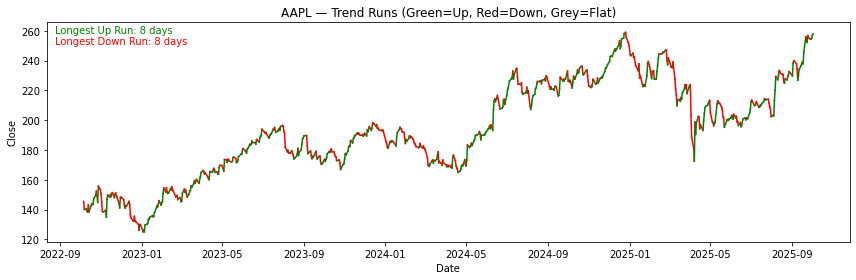

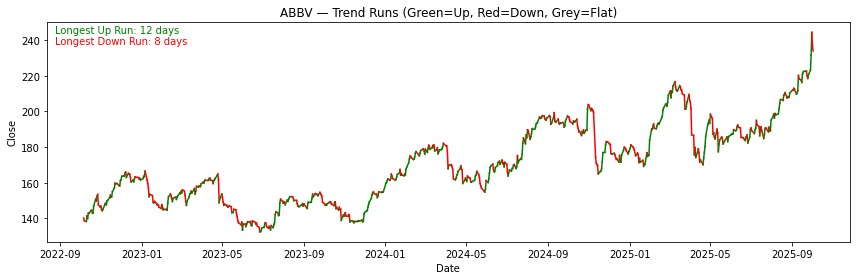

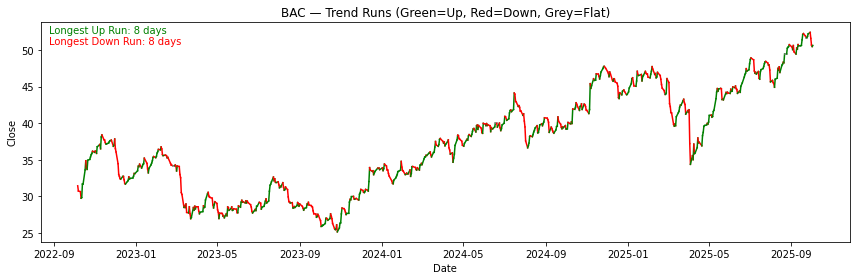

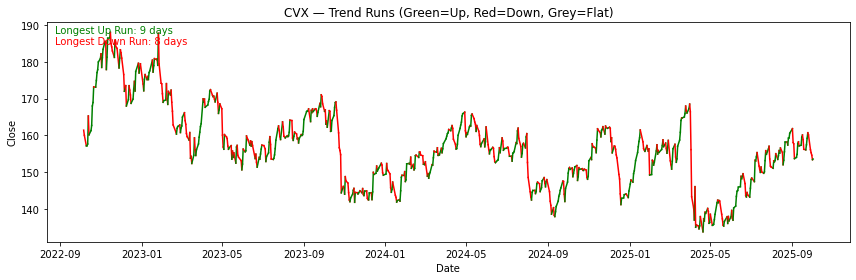

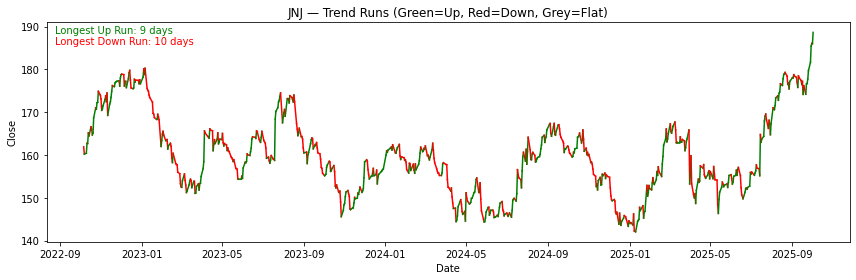

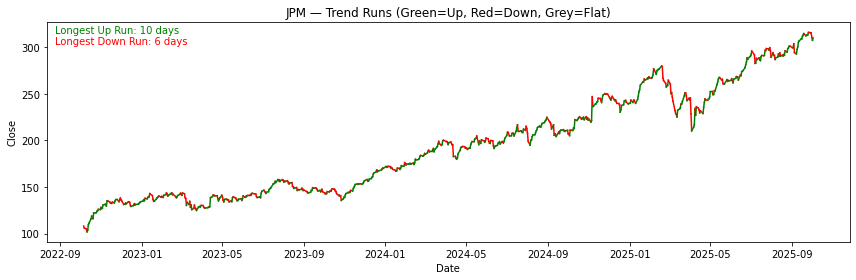

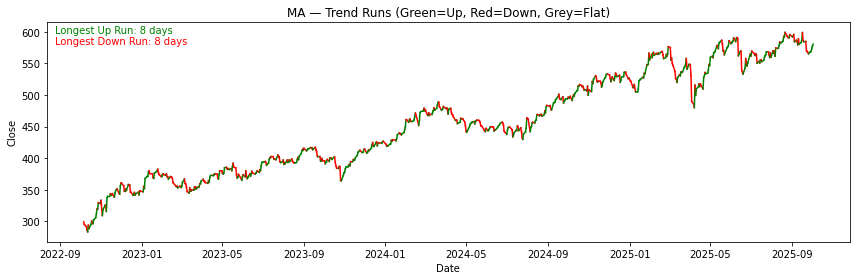

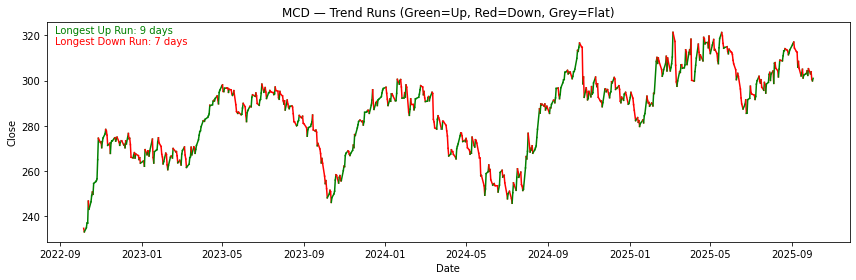

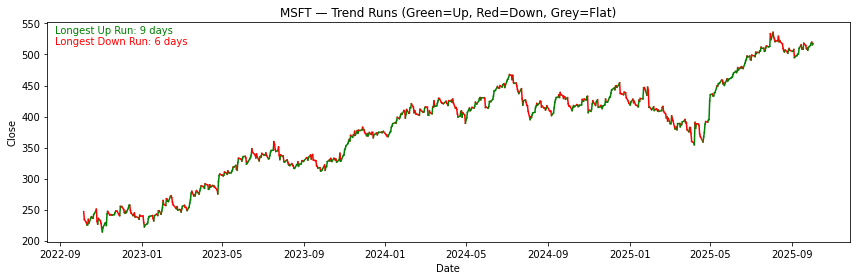

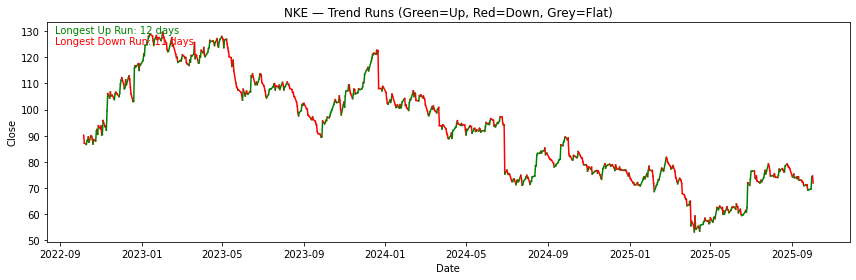

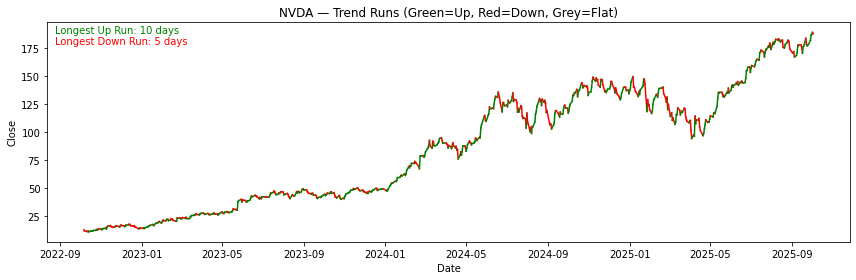

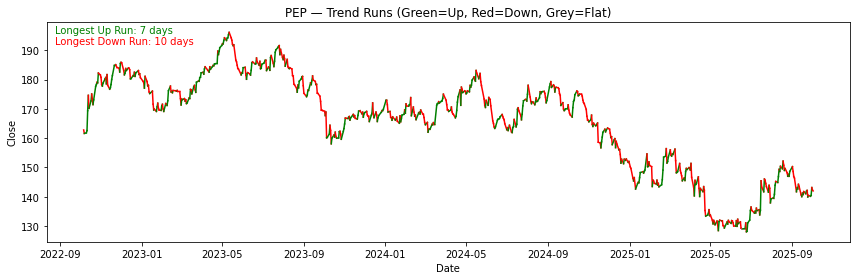

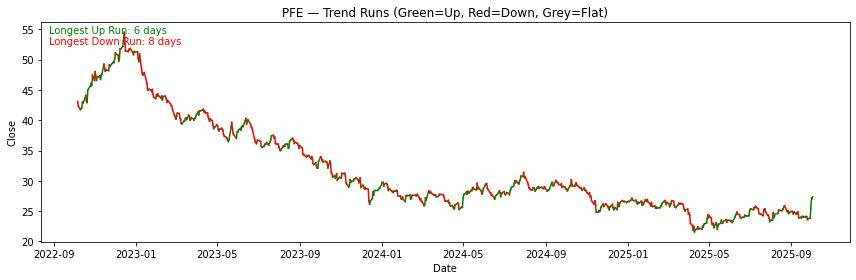

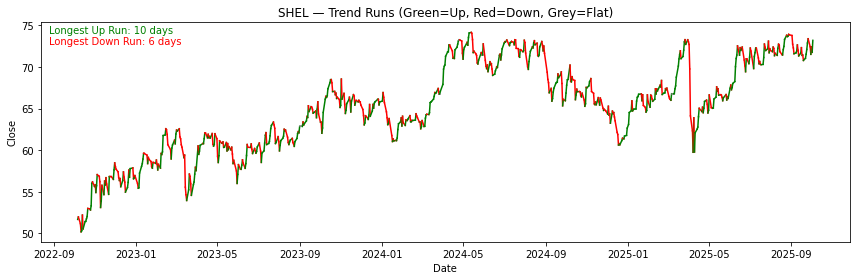

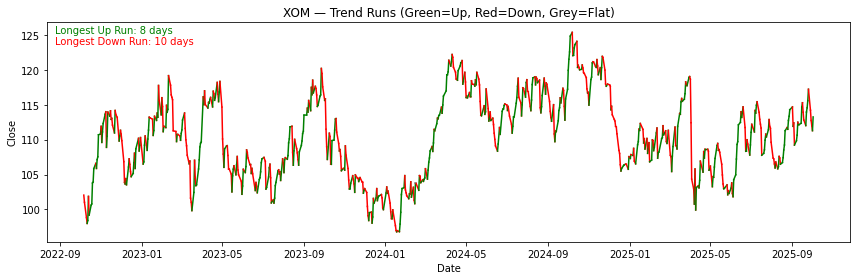

In [16]:
def plot_trend_runs_manual(rows, summary):
    """
    Plot coloured trend runs for each ticker (manual version).
    - Green segments = consecutive up days (Close_t > Close_{t-1})
    - Red segments   = consecutive down days (Close_t < Close_{t-1})
    - Grey segments  = flat days (Close_t == Close_{t-1})
    Annotates the longest up and down streaks using the manual summary.
    """

    # collect unique tickers from manual rows
    tickers = sorted(set(r["Ticker"] for r in rows))

    # loop over each ticker separately
    for ticker in tickers:
        # filter + sort rows for this ticker
        g = sorted([r for r in rows if r["Ticker"] == ticker],
                   key=lambda r: r["Date"])

        # build arrays of dates, closes
        dates = [r["Date"] for r in g]
        closes = [r["Close"] for r in g]

        # compute day-to-day direction manually
        dirs = [0]  # first day has no prior
        for i in range(1, len(closes)):
            if closes[i] > closes[i-1]:
                dirs.append(1)
            elif closes[i] < closes[i-1]:
                dirs.append(-1)
            else:
                dirs.append(0)

        plt.figure(figsize=(12, 4))

        # plot each daily segment coloured by direction
        for i in range(1, len(dates)):
            color = "green" if dirs[i] > 0 else ("red" if dirs[i] < 0 else "grey")
            plt.plot(dates[i-1:i+1], closes[i-1:i+1], color=color)

        # title + axis labels
        plt.title(f"{ticker} — Trend Runs (Green=Up, Red=Down, Grey=Flat)")
        plt.xlabel("Date")
        plt.ylabel("Close")

        # annotate longest runs using manual summary (list of dicts)
        row = next(s for s in summary if s["Ticker"] == ticker)
        plt.text(0.01, 0.95,
                 f"Longest Up Run: {row['Longest Up Run']} days",
                 transform=plt.gca().transAxes, color="green")
        plt.text(0.01, 0.90,
                 f"Longest Down Run: {row['Longest Down Run']} days",
                 transform=plt.gca().transAxes, color="red")

        plt.tight_layout()
        plt.show()


# example usage

# compute manual trend summary first
trend_summary_manual = compute_trend_runs_manual(rows)

# plot runs for all tickers using manual data
plot_trend_runs_manual(rows, trend_summary_manual)


#### Daily Returns

Daily returns measure the percentage change in closing price from one day to the next:

- Positive value → stock went up  
- Negative value → stock went down  
- Zero → no change  

This normalizes price changes across tickers and is used for analyzing volatility and short-term performance.

- Daily returns rationale:
- r_t = (P_t - P_{t-1}) / P_{t-1} = P_t / P_{t-1} - 1
- pandas Series.pct_change() computes (current - prior) / prior by default (periods=1),
- so groupby("Ticker")["Close"].pct_change() implements the same formula (first row per ticker is NaN by design).
- Multiply by 100 if you want percentage points instead of a fraction.
 Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pct_change.html

##### <span style="color:red; font-weight:bold">Manually computed Daily Returns (without modules)</span>


In [17]:
def add_daily_returns_manual(rows):
    """
    Compute daily returns for each ticker without using pandas/numpy.
    Formula:
        r_t = (P_t - P_{t-1}) / P_{t-1}
            = P_t / P_{t-1} - 1
    - rows: list of dicts, each like {"Ticker": "AAPL", "Date": "2022-01-01", "Close": 145.0}
    - Returns: a new list of dicts with an extra "Daily_Return" field.
    """
    # group rows manually by ticker
    grouped = {}
    for row in rows:
        tkr = row["Ticker"]
        grouped.setdefault(tkr, []).append(row)

    output = []   # will store all tickers with Daily_Return values

    # process each ticker separately
    for tkr, g in grouped.items():
        # ensure rows are in chronological order
        g = sorted(g, key=lambda r: r["Date"])
        prev_close = None

        # loop through ticker’s rows to compute returns
        for row in g:
            if prev_close is None:
                # first day has no previous close → no return
                row["Daily_Return"] = None
            else:
                # apply formula (current - prior) / prior
                row["Daily_Return"] = (row["Close"] - prev_close) / prev_close

            # update for next iteration
            prev_close = row["Close"]

            # collect row with new column
            output.append(row)

    return output

In [18]:
# example usage

# turn long_df into list of dicts
rows = long_df[["Date", "Ticker", "Close"]].to_dict(orient="records")

# run manual daily returns
returns_rows = add_daily_returns_manual(rows)

# convert back into DataFrame for analysis
long_df_returns_manual = pd.DataFrame(returns_rows)

# quick peek
display(long_df_returns_manual[["Date", "Ticker", "Close", "Daily_Return"]].head())

,Date,Ticker,Close,Daily_Return
0,2022-10-06,AAPL,145.429993,NaN
1,2022-10-07,AAPL,140.089996,-0.036719
2,2022-10-10,AAPL,140.419998,0.002356
3,2022-10-11,AAPL,138.979996,-0.010255
4,2022-10-12,AAPL,138.339996,-0.004605


##### <span style="color:red; font-weight:bold">Modules computed Daily Returns (with modules)</span>


In [19]:
def add_daily_returns(long_df: pd.DataFrame) -> pd.DataFrame:
    """
    Add daily percentage returns to a tidy DataFrame.

    Parameters
    ----------
    long_df : pd.DataFrame
        Must contain ['Date', 'Ticker', 'Close'] at minimum.
    Returns
    -------
    pd.DataFrame
        Copy of input with new column 'Daily_Return':
        Daily_Return_t = (Close_t / Close_{t-1}) - 1,
        computed per ticker.
    """
    # ensure ordering before applying pct_change
    df = long_df.sort_values(["Ticker", "Date"]).copy()

    # group per ticker and compute daily percentage change
    df["Daily_Return"] = df.groupby("Ticker")["Close"].pct_change()

    return df


# example usage
long_df_returns = add_daily_returns(long_df)

# quick peek at result
display(long_df_returns[["Date", "Ticker", "Close", "Daily_Return"]].head())

Price,Date,Ticker,Close,Daily_Return
0,2022-10-06,AAPL,145.429993,NaN
1,2022-10-07,AAPL,140.089996,-0.036719
2,2022-10-10,AAPL,140.419998,0.002356
3,2022-10-11,AAPL,138.979996,-0.010255
4,2022-10-12,AAPL,138.339996,-0.004605


In [20]:
def add_daily_returns(long_df: pd.DataFrame) -> pd.DataFrame:
    """
    Add daily percentage returns to a tidy DataFrame.
    Daily_Return_t = (Close_t / Close_{t-1}) - 1, computed per ticker.
    """
    df = long_df.sort_values(["Ticker", "Date"]).copy()
    df["Daily_Return"] = df.groupby("Ticker")["Close"].pct_change()
    return df

# Apply the function
long_df_returns = add_daily_returns(long_df)

# Get the latest daily return for each ticker
latest_returns = long_df_returns.sort_values("Date").groupby("Ticker").tail(1)

# Display only the latest daily return for 3 tickers
display(latest_returns[["Ticker", "Date", "Close", "Daily_Return"]].head(3))


Price,Ticker,Date,Close,Daily_Return
8260,NVDA,2025-10-03,187.619995,-0.006724
3003,CVX,2025-10-03,153.550003,0.001174
3754,JNJ,2025-10-03,188.639999,0.014303


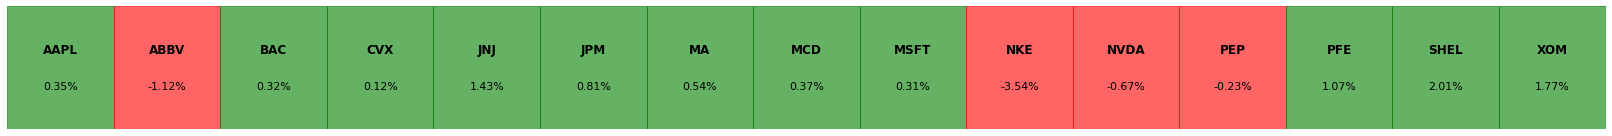

In [21]:
def latest_daily_returns_boxes_manual(rows):
    """
    Display the latest daily returns for each ticker as colored boxes (manual version).
    - Green = positive return
    - Red   = negative return
    - Grey  = flat (0%)
    Steps:
      1. Group rows by ticker
      2. Sort each ticker’s rows by Date
      3. Compute daily returns manually:
            r_t = (Close_t - Close_{t-1}) / Close_{t-1}
      4. Keep the latest row for each ticker
      5. Draw colored boxes with ticker symbol + return %
    """

    # group rows manually by ticker
    grouped = {}
    for r in rows:
        tkr = r["Ticker"]
        grouped.setdefault(tkr, []).append(r)

    latest = []   # will store one latest row per ticker

    # process each ticker separately
    for tkr, g in grouped.items():
        # sort by date so rows are in chronological order
        g = sorted(g, key=lambda r: r["Date"])
        prev_close = None

        # compute daily returns manually
        for r in g:
            if prev_close is None:
                r["Daily_Return"] = 0.0   # first row → no return
            else:
                r["Daily_Return"] = (r["Close"] - prev_close) / prev_close
            prev_close = r["Close"]

        # take the last row for this ticker
        latest.append(g[-1])

    # plot boxes
    fig, ax = plt.subplots(figsize=(1.5 * len(latest), 2))
    ax.axis("off")

    for i, row in enumerate(latest):
        val = row["Daily_Return"]                   # numeric return
        text = f"{round(val * 100, 2)}%"            # formatted string
        ticker = row["Ticker"]

        # choose box color
        if val > 0:
            color = "green"
        elif val < 0:
            color = "red"
        else:
            color = "grey"

        # draw rectangle for this ticker
        ax.add_patch(Rectangle((i, 0), 1, 1, color=color, alpha=0.6))

        # write ticker symbol (top half)
        ax.text(i + 0.5, 0.65, ticker,
                ha="center", va="center", fontsize=12, fontweight="bold", color="black")

        # write return % (bottom half)
        ax.text(i + 0.5, 0.35, text,
                ha="center", va="center", fontsize=11, color="black")

    # adjust limits so boxes line up neatly
    ax.set_xlim(0, len(latest))
    ax.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()


# example usage
latest_daily_returns_boxes_manual(rows)


### Max Profit Calculation

Implements the classic stock trading problem: **Best Time to Buy and Sell Stock II**  
https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii/

- Assumes multiple buy/sell transactions are allowed.  
- Profit is maximized by summing all **upward price moves** (buy before a rise, sell at the peak).  
- Ignores transaction costs and assumes instant trades at daily closes.  

This gives the theoretical maximum profit achievable over the period if one could trade optimally.


- With unlimited transactions (but only one position at a time and sell after buy),
- the optimal hindsight profit equals the sum of all positive day-to-day price increases.
- This is a theoretical maximum over the history (not a trading signal).
- Source (explains problem constraints and the “accumulate positive differences” solution):
- https://www.geeksforgeeks.org/dsa/stock-buy-sell/

##### <span style="color:red; font-weight:bold">Manually computed Max Profit (without modules)</span>


In [22]:
def extract_trades_for_ticker_manual(rows, ticker: str):
    """
    For one ticker:
      - Buy just before a price rise (when price goes up after today)
      - Sell at the peak (just before a drop, or on the very last day)
    Returns:
      - list of dicts, where each dict = one completed trade
        (buy_date, buy_price, sell_date, sell_price, profit)
    """
    # keep only the rows for the requested ticker
    g = [r for r in rows if r["Ticker"] == ticker]

    # sort the rows by Date to ensure proper time order
    g = sorted(g, key=lambda r: r["Date"])

    trades = []                     # final list to hold all completed trades
    holding = False                 # flag: are we currently "in" a trade?
    buy_date = buy_price = None     # placeholders for buy signal info

    # loop through rows starting at the 2nd one (need prev+curr to compare)
    for i in range(1, len(g)):
        # get yesterday’s and today’s closing prices
        prev_p, cur_p = g[i-1]["Close"], g[i]["Close"]

        # also track the dates (for recording trades later)
        prev_d, cur_d = g[i-1]["Date"], g[i]["Date"]

        # BUY RULE:
        # If not holding and today’s price is higher than yesterday’s,
        # that means a rise started yesterday → "buy" at yesterday’s close
        if not holding and cur_p > prev_p:
            holding = True
            buy_date, buy_price = prev_d, prev_p

        # SELL RULE:
        # If holding, we want to sell at the peak:
        #   - condition 1: tomorrow is lower (peak reached today)
        #   - condition 2: we’re at the last row
        is_last = (i == len(g) - 1)   # check if we are at the final row
        next_drop_or_end = (cur_p > prev_p and (is_last or g[i+1]["Close"] < cur_p))

        if holding and next_drop_or_end:
            sell_date, sell_price = cur_d, cur_p
            # record this completed trade
            trades.append({
                "Ticker": ticker,
                "buy_date": buy_date, "buy_price": buy_price,
                "sell_date": sell_date, "sell_price": sell_price,
                "profit": sell_price - buy_price
            })
            # reset so we are ready for the next trade
            holding = False

    return trades


def trades_for_all_manual(rows):
    """
    Collect trades for *all* tickers in the dataset.
    Steps:
      - build list of unique tickers
      - run extract_trades_for_ticker_manual on each
      - extend all results into one combined list
    """
    out = []  # combined trades from all tickers
    tickers = sorted(set(r["Ticker"] for r in rows))   # unique tickers
    for tkr in tickers:
        # get trades for this ticker and add them to the master list
        out.extend(extract_trades_for_ticker_manual(rows, tkr))
    return out


def max_profit_summary_manual(rows):
    """
    Compute max profit (sum of rises) per ticker.
    Steps:
      - for each ticker, collect all its trades
      - sum all 'profit' values from those trades
      - build a summary dict: {"Ticker": TKR, "Max_Profit": total}
      - return all tickers sorted by Max_Profit (descending)
    """
    out = []
    tickers = sorted(set(r["Ticker"] for r in rows))   # unique tickers
    for tkr in tickers:
        trades = extract_trades_for_ticker_manual(rows, tkr)
        total = sum(t["profit"] for t in trades)   # sum of all profits
        out.append({"Ticker": tkr, "Max_Profit": total})

    # sort by highest profit first
    out.sort(key=lambda x: x["Max_Profit"], reverse=True)
    return out


In [23]:
# example usage

# all trades for AAPL
aapl_trades = extract_trades_for_ticker_manual(rows, "AAPL")
df_aapl_trades = pd.DataFrame(aapl_trades)   # convert list of dicts → DataFrame
display(df_aapl_trades.head())

# all trades for all tickers
all_trades = trades_for_all_manual(rows)
df_all_trades = pd.DataFrame(all_trades)
display(df_all_trades.head())

# per-ticker profit summary
profit_summary = max_profit_summary_manual(rows)
df_profit_summary = pd.DataFrame(profit_summary)
display(df_profit_summary)

,Ticker,buy_date,buy_price,sell_date,sell_price,profit
0,AAPL,2022-10-07,140.089996,2022-10-10,140.419998,0.330002
1,AAPL,2022-10-12,138.339996,2022-10-13,142.990005,4.650009
2,AAPL,2022-10-14,138.380005,2022-10-19,143.860001,5.479996
3,AAPL,2022-10-20,143.389999,2022-10-25,152.339996,8.949997
4,AAPL,2022-10-27,144.800003,2022-10-28,155.740005,10.940002


,Ticker,buy_date,buy_price,sell_date,sell_price,profit
0,AAPL,2022-10-07,140.089996,2022-10-10,140.419998,0.330002
1,AAPL,2022-10-12,138.339996,2022-10-13,142.990005,4.650009
2,AAPL,2022-10-14,138.380005,2022-10-19,143.860001,5.479996
3,AAPL,2022-10-20,143.389999,2022-10-25,152.339996,8.949997
4,AAPL,2022-10-27,144.800003,2022-10-28,155.740005,10.940002


,Ticker,Max_Profit
0,MSFT,1653.509949
1,MA,1631.590363
2,AAPL,907.639977
3,MCD,865.689987
4,JPM,835.390022
5,NVDA,808.416080
6,ABBV,697.820175
7,CVX,622.640091
8,PEP,499.050049
9,XOM,468.889938


##### <span style="color:red; font-weight:bold">Module computed Max Profit (with modules)</span>


In [24]:
def extract_trades_for_ticker(long_df: pd.DataFrame, ticker: str):
    """
    For one ticker:
      - Buy before a rise (when price goes up after today)
      - Sell at the peak (just before a drop or at the last day)
    Returns a list of trades as dicts.
    """
    g = (long_df[long_df["Ticker"] == ticker]
         .sort_values("Date")[["Date", "Close"]].reset_index(drop=True))

    trades = []
    holding = False
    buy_date = buy_price = None

    for i in range(1, len(g)):
        prev_p, cur_p = g.loc[i-1, "Close"], g.loc[i, "Close"]
        prev_d, cur_d = g.loc[i-1, "Date"],  g.loc[i, "Date"]

        # buy when price rises compared to yesterday
        if not holding and cur_p > prev_p:
            holding = True
            buy_date, buy_price = prev_d, prev_p

        # sell at peak (next day lower OR last day)
        is_last = (i == len(g) - 1)
        next_drop_or_end = (cur_p > prev_p and (is_last or g.loc[i+1, "Close"] < cur_p))
        if holding and next_drop_or_end:
            sell_date, sell_price = cur_d, cur_p
            trades.append({
                "buy_date": buy_date, "buy_price": buy_price,
                "sell_date": sell_date, "sell_price": sell_price,
                "profit": sell_price - buy_price
            })
            holding = False

    return trades


def trades_df_for_ticker(long_df: pd.DataFrame, ticker: str) -> pd.DataFrame:
    """
    Convert trades for one ticker into a DataFrame.
    """
    return pd.DataFrame(extract_trades_for_ticker(long_df, ticker))


def trades_df_for_all(long_df: pd.DataFrame) -> pd.DataFrame:
    """
    Collect trades for all tickers into one DataFrame.
    """
    rows = []
    for tkr in long_df["Ticker"].unique():
        for t in extract_trades_for_ticker(long_df, tkr):
            t["Ticker"] = tkr
            rows.append(t)
    return pd.DataFrame(rows).sort_values(["Ticker", "buy_date"]).reset_index(drop=True)


def max_profit_summary(long_df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute total profit (sum of rises) per ticker.
    Returns DataFrame sorted by profit.
    """
    out = []
    for tkr in long_df["Ticker"].unique():
        profit = sum(t["profit"] for t in extract_trades_for_ticker(long_df, tkr))
        out.append({"Ticker": tkr, "Max_Profit": profit})
    return pd.DataFrame(out).sort_values("Max_Profit", ascending=False)


# example usage

# all trades for AAPL
display(trades_df_for_ticker(long_df, "AAPL"))

# trades for all tickers
display(trades_df_for_all(long_df).head())

# per-ticker profit summary
display(max_profit_summary(long_df))

,buy_date,buy_price,sell_date,sell_price,profit
0,2022-10-07,140.089996,2022-10-10,140.419998,0.330002
1,2022-10-12,138.339996,2022-10-13,142.990005,4.650009
2,2022-10-14,138.380005,2022-10-19,143.860001,5.479996
3,2022-10-20,143.389999,2022-10-25,152.339996,8.949997
4,2022-10-27,144.800003,2022-10-28,155.740005,10.940002
...,...,...,...,...,...
177,2025-09-02,229.720001,2025-09-04,239.779999,10.059998
178,2025-09-10,226.789993,2025-09-17,238.990005,12.200012
179,2025-09-18,237.880005,2025-09-22,256.079987,18.199982
180,2025-09-24,252.309998,2025-09-25,256.869995,4.559998


,buy_date,buy_price,sell_date,sell_price,profit,Ticker
0,2022-10-07,140.089996,2022-10-10,140.419998,0.330002,AAPL
1,2022-10-12,138.339996,2022-10-13,142.990005,4.650009,AAPL
2,2022-10-14,138.380005,2022-10-19,143.860001,5.479996,AAPL
3,2022-10-20,143.389999,2022-10-25,152.339996,8.949997,AAPL
4,2022-10-27,144.800003,2022-10-28,155.740005,10.940002,AAPL


,Ticker,Max_Profit
8,MSFT,1653.509949
6,MA,1631.590363
0,AAPL,907.639977
7,MCD,865.689987
5,JPM,835.390022
10,NVDA,808.416080
1,ABBV,697.820175
3,CVX,622.640091
11,PEP,499.050049
14,XOM,468.889938


In [25]:
def plot_trades_interactive_manual(rows, ticker: str):
    """
    Interactive Plotly graph (manual version) for one ticker.
    - Input: rows (list of dicts from your dataset with "Ticker","Date","Close")
    - Uses extract_trades_for_ticker_manual() to find trades
    - Shows:
        * Blue line = full Close price series
        * Green line segments = profitable trades
        * Buy markers = green triangles
        * Sell markers = red triangles
        * Profit annotations at sell points
    """
    # filter rows for just this ticker
    g = [r for r in rows if r["Ticker"] == ticker]
    g = sorted(g, key=lambda r: r["Date"])   # ensure sorted by Date

    # Get trades from the manual function
    trades = extract_trades_for_ticker_manual(rows, ticker)
    total_profit = sum(t["profit"] for t in trades)

    # create Plotly figure 
    fig = go.Figure()

    # base Close price line
    fig.add_trace(go.Scatter(
        x=[r["Date"] for r in g], 
        y=[r["Close"] for r in g],
        mode="lines", name=f"{ticker} Close",
        line=dict(width=1.2, color="blue"), opacity=0.6
    ))

    # loop through each trade and draw segments + markers
    for t in trades:
        # trade segment (green line from buy→sell)
        seg_dates = [d for d in [r["Date"] for r in g] if t["buy_date"] <= d <= t["sell_date"]]
        seg_prices = [r["Close"] for r in g if t["buy_date"] <= r["Date"] <= t["sell_date"]]

        fig.add_trace(go.Scatter(
            x=seg_dates, y=seg_prices,
            mode="lines", name="Profitable Trade",
            line=dict(width=2.5, color="green")
        ))

        # buy marker
        fig.add_trace(go.Scatter(
            x=[t["buy_date"]], y=[t["buy_price"]],
            mode="markers", name="Buy",
            marker=dict(symbol="triangle-up", color="green", size=10)
        ))

        # sell marker
        fig.add_trace(go.Scatter(
            x=[t["sell_date"]], y=[t["sell_price"]],
            mode="markers", name="Sell",
            marker=dict(symbol="triangle-down", color="red", size=10)
        ))

        # profit annotation near sell
        fig.add_annotation(
            x=t["sell_date"], y=t["sell_price"],
            text=f"+{t['profit']:.2f}",
            showarrow=False, font=dict(color="green", size=10),
            xanchor="left", yanchor="bottom"
        )

    # layout cleanup
    fig.update_layout(
        showlegend=False,
        title=f"{ticker} Trades (Total Profit = {total_profit:.2f})",
        margin=dict(t=30),
        xaxis_title="Date", yaxis_title="Price",
        hovermode="x unified", template="plotly_white", height=500
    )

    fig.show()


# example usage
plot_trades_interactive_manual(rows, "AAPL")
